In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
para=pd.read_csv('../indo_pubished.dat')

In [4]:
tr=np.load('../train_indo.npz',encoding='bytes')

In [5]:
test=np.load('../test_indo.npz',encoding='bytes')

In [44]:
test.items()

[('arr_0',
  array([ array([b'27382.fits', b'27971.fits', b'28292.fits', b'30812.fits',
         b'31421.fits', b'35369.fits', b'3817.fits', b'38656.fits',
         b'39003.fits', b'40035.fits', b'4128.fits', b'417.fits',
         b'4188.fits', b'43039.fits', b'43232.fits', b'43380.fits',
         b'43827.fits', b'44951.fits', b'46184.fits', b'47205.fits',
         b'47731.fits', b'48432.fits', b'48433.fits', b'4963.fits',
         b'5007.fits', b'5234.fits', b'54719.fits', b'55280.fits',
         b'57264.fits', b'57669.fits', b'57727.fits', b'58207.fits',
         b'5848.fits', b'6186.fits', b'6203.fits', b'62509.fits',
         b'6482.fits', b'65714.fits', b'6805.fits', b'7087.fits',
         b'71369.fits', b'76294.fits', b'80499.fits', b'80586.fits',
         b'81146.fits', b'8207.fits', b'82395.fits', b'82741.fits',
         b'83506.fits', b'83805.fits', b'84441.fits', b'8491.fits',
         b'8512.fits', b'85444.fits', b'85503.fits', b'86322.fits',
         b'8705.fits', b'88284.f

In [6]:
nam=pd.Series(test.items()[0][1][0])

In [7]:
nam

0         b'27382.fits'
1         b'27971.fits'
2         b'28292.fits'
3         b'30812.fits'
4         b'31421.fits'
5         b'35369.fits'
6          b'3817.fits'
7         b'38656.fits'
8         b'39003.fits'
9         b'40035.fits'
10         b'4128.fits'
11          b'417.fits'
12         b'4188.fits'
13        b'43039.fits'
14        b'43232.fits'
15        b'43380.fits'
16        b'43827.fits'
17        b'44951.fits'
18        b'46184.fits'
19        b'47205.fits'
20        b'47731.fits'
21        b'48432.fits'
22        b'48433.fits'
23         b'4963.fits'
24         b'5007.fits'
25         b'5234.fits'
26        b'54719.fits'
27        b'55280.fits'
28        b'57264.fits'
29        b'57669.fits'
            ...        
47        b'82741.fits'
48        b'83506.fits'
49        b'83805.fits'
50        b'84441.fits'
51         b'8491.fits'
52         b'8512.fits'
53        b'85444.fits'
54        b'85503.fits'
55        b'86322.fits'
56         b'8705.fits'
57        b'8828

In [8]:
mm=[]
ids=[]
for k in nam:
    for i,j in para.iterrows():
        if bytes.decode(k[:-5]) == j[0]:
            ids.append(nam[nam == k].index[0])
            mm.append (j)

In [9]:
len(mm)

74

In [10]:
trs=pd.DataFrame(mm,index=range(0,74,1))

In [50]:
trs.head(2)

,ID,Teff,logg,feh
0,27382,4480,2.67,-0.37
1,27971,4860,2.82,-0.08


In [53]:
trs.to_csv('indo_test_labels',index=False)

In [32]:
tr1=trs.drop_duplicates()

In [33]:
tr1.to_csv('train_labels.csv',index=False)

In [33]:
test_res=pd.read_csv('indo_test_res.dat',header=None,sep=' ')

In [34]:
test_res.head(2)

,0,1,2,3
0,27382.fits,4577.954502,2.347226,-0.023223
1,27971.fits,4499.307291,2.409540,-0.044327


In [35]:
test_res[0]=test_res[0].astype(str).str[:-5]

In [36]:
res_merge=trs.merge(test_res,left_on='ID',right_on=[0])

In [37]:
res_merge.head(2)

,ID,Teff,logg,feh,0,1,2,3
0,27382,4480,2.67,-0.37,27382,4577.954502,2.347226,-0.023223
1,27971,4860,2.82,-0.08,27971,4499.307291,2.409540,-0.044327


In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

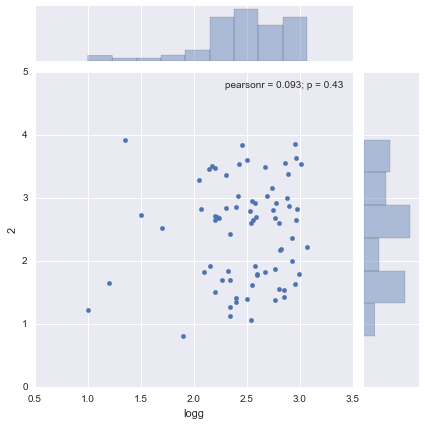

In [58]:
sns.jointplot(res_merge['logg'],res_merge[2],ylim=(0,5))

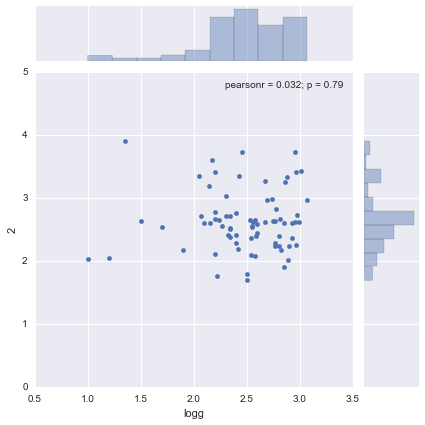

In [61]:
test_res=pd.read_csv('indo_test_res.dat',header=None,sep=' ')
test_res[0]=test_res[0].astype(str).str[:-5]
res_merge=trs.merge(test_res,left_on='ID',right_on=[0])
sns.jointplot(res_merge['logg'],res_merge[2],ylim=(0,5))

In [55]:
import scipy

In [57]:
scipy.stats.pearsonr(res_merge['logg'],res_merge[2])[0]

0.093380789023118402

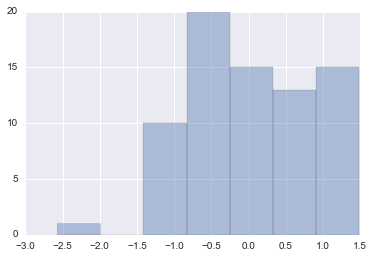

In [50]:
sns.distplot(res_merge['logg']-res_merge[2],kde=None)

In [54]:
pd.read_csv('indo_test_labels')

,ID,Teff,logg,feh
0,27382,4480,2.67,-0.37
1,27971,4860,2.82,-0.08
2,28292,4520,2.58,-0.17
3,30812,4668,2.34,0.05
4,31421,4400,2.56,-0.10
5,35369,4850,2.24,-0.19
6,3817,4970,2.85,-0.26
7,38656,4910,2.77,-0.27
8,39003,4550,1.90,-0.04
9,40035,4840,2.85,-0.15


In [74]:
dls=np.arange(20,110,20)
qs=np.arange(0.1,1,0.1)
fracs=np.arange(0.01,.2,0.02)
fits=np.arange(1,8,1)
fits2=np.arange(1,8,1)
fitm=['sinusoid','chebyshev ']

In [75]:
import itertools

In [116]:
for i in itertools.product(dls,qs,fracs):
    dl,qv,fv=i
    print (i,dl*qv/fv)

(20, 0.10000000000000001, 0.01) 200.0
(20, 0.10000000000000001, 0.029999999999999999) 66.6666666667
(20, 0.10000000000000001, 0.049999999999999996) 40.0
(20, 0.10000000000000001, 0.069999999999999993) 28.5714285714
(20, 0.10000000000000001, 0.089999999999999983) 22.2222222222
(20, 0.10000000000000001, 0.10999999999999997) 18.1818181818
(20, 0.10000000000000001, 0.12999999999999998) 15.3846153846
(20, 0.10000000000000001, 0.14999999999999999) 13.3333333333
(20, 0.10000000000000001, 0.16999999999999998) 11.7647058824
(20, 0.10000000000000001, 0.18999999999999997) 10.5263157895
(20, 0.20000000000000001, 0.01) 400.0
(20, 0.20000000000000001, 0.029999999999999999) 133.333333333
(20, 0.20000000000000001, 0.049999999999999996) 80.0
(20, 0.20000000000000001, 0.069999999999999993) 57.1428571429
(20, 0.20000000000000001, 0.089999999999999983) 44.4444444444
(20, 0.20000000000000001, 0.10999999999999997) 36.3636363636
(20, 0.20000000000000001, 0.12999999999999998) 30.7692307692
(20, 0.200000000000

In [107]:
import numpy as np

In [108]:
for i in np.random.shuffle(np.array(itertools.product(dls,qs,fracs))):
    dl,qv,fv=i
    print (i,dl*qv/fv)  

TypeError: len() of unsized object

In [119]:
a=list(itertools.product(dls,qs,fracs))
random.shuffle(a)
for i in a :
    print (i)

(60, 0.70000000000000007, 0.069999999999999993)
(20, 0.10000000000000001, 0.01)
(80, 0.40000000000000002, 0.089999999999999983)
(20, 0.90000000000000002, 0.16999999999999998)
(60, 0.5, 0.18999999999999997)
(100, 0.80000000000000004, 0.049999999999999996)
(100, 0.40000000000000002, 0.029999999999999999)
(60, 0.40000000000000002, 0.12999999999999998)
(60, 0.59999999999999998, 0.089999999999999983)
(40, 0.80000000000000004, 0.049999999999999996)
(80, 0.40000000000000002, 0.01)
(40, 0.10000000000000001, 0.18999999999999997)
(80, 0.5, 0.049999999999999996)
(100, 0.40000000000000002, 0.089999999999999983)
(20, 0.40000000000000002, 0.049999999999999996)
(60, 0.70000000000000007, 0.12999999999999998)
(60, 0.80000000000000004, 0.01)
(60, 0.59999999999999998, 0.049999999999999996)
(80, 0.80000000000000004, 0.069999999999999993)
(80, 0.59999999999999998, 0.14999999999999999)
(20, 0.10000000000000001, 0.18999999999999997)
(40, 0.10000000000000001, 0.089999999999999983)
(100, 0.20000000000000001, 0